In [37]:
import torch
import matplotlib.pyplot as plt
A=8
W=1
qat_acc = []
qavat_acc = []
noise_list = (0.1,0.2,0.3,0.4,0.5)
for noise in noise_list:
    basemodel = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise0.0.ckpt'%(noise,A,W)
    VAmodel = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)
    basemodel_res = torch.load(basemodel)
    VAmodel_res = torch.load(VAmodel)
    print("noise %s"%noise)
    print("QAT %.4f"%(basemodel_res['mean_acc']))
    print("QAT+VAT %.4f"%(VAmodel_res['mean_acc']))
    print("")
    qat_acc.append(basemodel_res['mean_acc'])
    qavat_acc.append(VAmodel_res['mean_acc'])

noise 0.1
QAT 0.8811
QAT+VAT 0.8784

noise 0.2
QAT 0.8721
QAT+VAT 0.8693

noise 0.3
QAT 0.8544
QAT+VAT 0.8565

noise 0.4
QAT 0.8224
QAT+VAT 0.8361

noise 0.5
QAT 0.7711
QAT+VAT 0.8184



In [16]:
qat_acc[0]

0.8842736

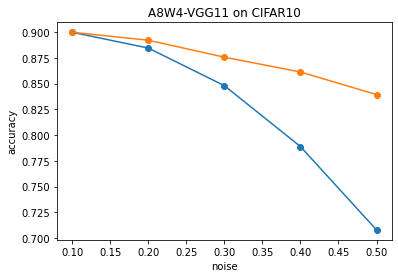

In [30]:
plt.plot(noise_list,qat_acc,label='QAT')
plt.scatter(noise_list,qat_acc)
plt.plot(noise_list,qavat_acc,label='QAVAT')
plt.scatter(noise_list,qavat_acc)
plt.title('A%sW%s-VGG11 on CIFAR10'%(A,W))
plt.xlabel('noise')
plt.ylabel('accuracy')
plt.show()

noise 0.1
A8W1 0.8811

noise 0.1
A8W3 0.8843

noise 0.1
A8W4 0.8998

noise 0.2
A8W1 0.8721

noise 0.2
A8W3 0.8678

noise 0.2
A8W4 0.8845

noise 0.3
A8W1 0.8544

noise 0.3
A8W3 0.8320

noise 0.3
A8W4 0.8480

noise 0.4
A8W1 0.8224

noise 0.4
A8W3 0.7715

noise 0.4
A8W4 0.7889

noise 0.5
A8W1 0.7711

noise 0.5
A8W3 0.6757

noise 0.5
A8W4 0.7080



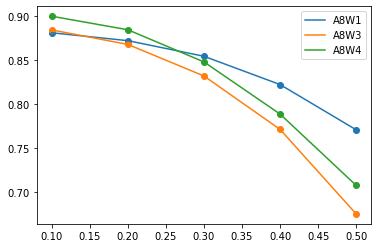

In [28]:
A=8
W_list=[1,3,4]
acc_listOflist=[[] for _ in W_list]
noise_list = (0.1,0.2,0.3,0.4,0.5)
for noise in noise_list:
    for i in range(len(W_list)):
        W = W_list[i]
        model = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)
        model = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise0.0.ckpt'%(noise,A,W)
        model_res = torch.load(model)
        print("noise %s"%noise)
        print("A%sW%s %.4f"%(A,W,model_res['mean_acc']))
        print("")
        acc_listOflist[i].append(model_res['mean_acc'])
        
for i in range(len(W_list)):
    W = W_list[i]
    plt.plot(noise_list,acc_listOflist[i],label='A%sW%s'%(A,W))
    plt.scatter(noise_list,acc_listOflist[i])
    plt.legend()
plt.show()

    